# Optimal Transport

see: 
    http://alexhwilliams.info/itsneuronalblog/2020/10/09/optimal-transport/

for the blog post on ot I have found. 

# Playing around with graphing some distributions 





### Desnity plot using kde estimate of pdf

(10000,) (10000,)


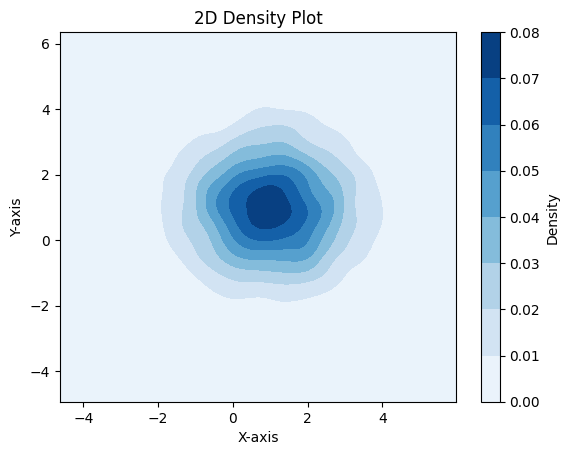

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate some random data
x = np.random.randn(10000) + np.random.normal(1,1,10000)
y = np.random.randn(10000) + np.random.normal(1,1,10000)

print(x.shape, y.shape)

# Calculate the kernel density estimate
kde = gaussian_kde([x, y])
xmin, ymin = x.min(), y.min()
xmax, ymax = x.max(), y.max()

# Create a grid to evaluate the KDE on
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

# Evaluate the KDE on the grid
Z = np.reshape(kde(positions).T, X.shape)

# Create a contour plot of the density
plt.contourf(X, Y, Z, cmap='Blues')

# Add colorbar
cb = plt.colorbar()
cb.set_label('Density')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Density Plot')

# Show plot
plt.show()

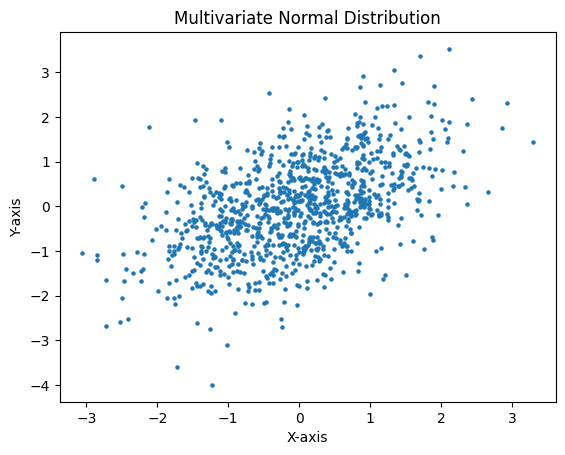

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define mean and covariance matrix
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

# Generate random samples from the distribution
x, y = np.random.multivariate_normal(mean, cov, 1000).T

# Create scatter plot of the samples
plt.scatter(x, y, s=5)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multivariate Normal Distribution')

# Show plot
plt.show()

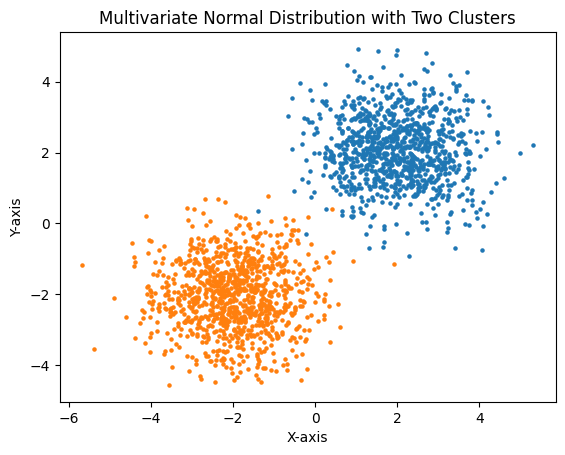

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define mean vectors and covariance matrices for two clusters
mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]
mean2 = [-2, -2]
cov2 = [[1, 0], [0, 1]]

# Generate random samples from the two clusters
x1, y1 = np.random.multivariate_normal(mean1, cov1, 1000).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 1000).T

# Create scatter plot of the samples from each cluster
plt.scatter(x1, y1, s=5)
plt.scatter(x2, y2, s=5)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multivariate Normal Distribution with Two Clusters')

# Show plot
plt.show()

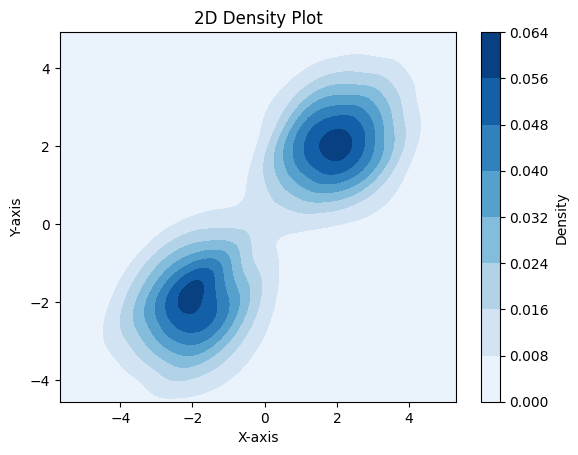

In [4]:



# Calculate the kernel density estimate
x = np.hstack([x1, x2])
y = np.hstack([y1, y2])
kde = gaussian_kde([x, y])
xmin, ymin = x.min(), y.min()
xmax, ymax = x.max(), y.max()

# Create a grid to evaluate the KDE on
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

# Evaluate the KDE on the grid
Z = np.reshape(kde(positions).T, X.shape)

# Create a contour plot of the density
plt.contourf(X, Y, Z, cmap='Blues')

# Add colorbar
cb = plt.colorbar()
cb.set_label('Density')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Density Plot')

# Show plot
plt.show()

### 1d density with knn

(1000,)


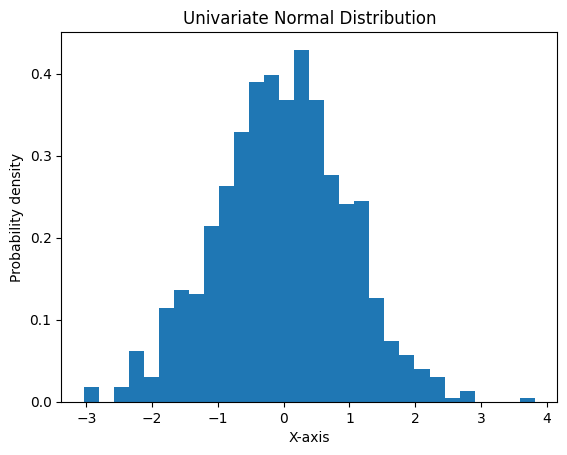

In [5]:
import matplotlib.pyplot as plt

# Define mean and standard deviation
mean = 0
std_dev = 1

# Generate random samples from the distribution
samples = np.random.normal(mean, std_dev, 1000)

print(samples.shape)

# Create histogram of the samples
plt.hist(samples, bins=30, density=True)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Probability density')
plt.title('Univariate Normal Distribution')

# Show plot
plt.show()

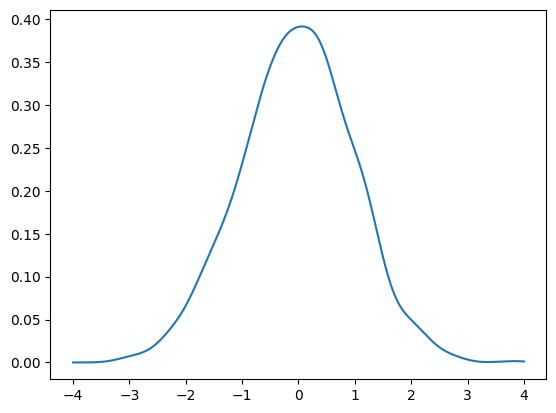

In [6]:

kde = gaussian_kde([samples])
samples_min, samples_max = samples.min(), samples.max()

L = np.linspace(-4,4,10000)
plt.plot(L, kde(L))


### make this a bit more interesting 

Text(0.5, 1.0, 'two random 1d densities')

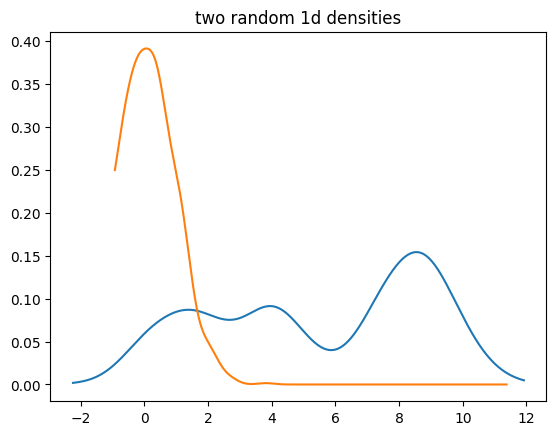

In [7]:
def random_1d_density():
    '''
    kde = p.d.f function
    L = linespace numpy
    '''
    samples = []
    for _ in range(4):
        mu = np.random.randint(0,10)
        samples.append(np.random.normal(mu, 1, 1000))    
    samples = np.hstack(samples)
    kde = gaussian_kde([samples])
    L = np.linspace(np.min(samples),np.max(samples),10000)
    return kde, L 


kde1, L1 = random_1d_density()
plt.plot(L1, kde1(L1))

kde2, L2 = random_1d_density()
plt.plot(L2, kde(L2))

plt.title('two random 1d densities')

# discretization of the desntities 



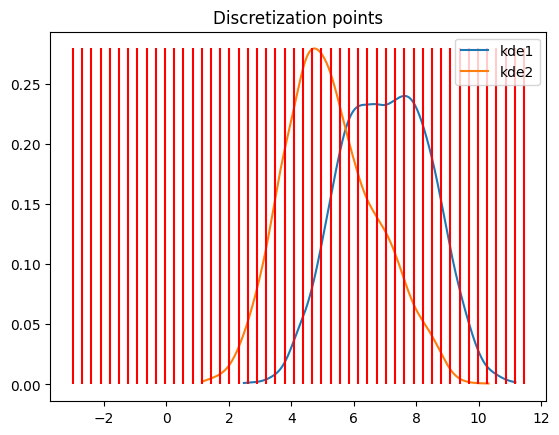

In [26]:
nbins = 50
Lmin = np.min([L1[0], L2[0]])
Lmax = np.max([L1[-1],L2[-1]])
bins = np.linspace(Lmin, Lmax, nbins)


kde1, L1 = random_1d_density()
plt.plot(L1, kde1(L1), label='kde1')

kde2, L2 = random_1d_density()
plt.plot(L2, kde2(L2), label='kde2')

plt.title('Discretization points')
plt.legend()
plt.vlines(bins, ymin=0, ymax=np.max(np.hstack([kde1(L1), kde2(L2)])), color='red')

In [27]:
discretized_kde1 = np.zeros(nbins-1)
discretized_kde2 = np.zeros(nbins-1)
for i in range(nbins-1):
    Lbin = np.linspace(bins[i], bins[i+1], 100)
    discretized_kde1[i] = np.round(np.mean(kde1(Lbin)), 2)
    discretized_kde2[i] = np.round(np.mean(kde2(Lbin)), 2)

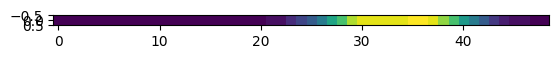

In [28]:
plt.imshow(discretized_kde1[np.newaxis])

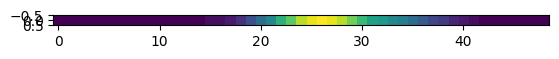

In [29]:
plt.imshow(discretized_kde2[np.newaxis])

In [30]:
# check difference in mass
print(f'discretized kde1 total mass = {np.sum(discretized_kde1)}')
print(f'discretized kde1 total mass = {np.sum(discretized_kde2)}')
diff = np.sum(discretized_kde1) - np.sum(discretized_kde2)
print(f'diff = {diff}')
discretized_kde1[-1] -= diff
diff_ = np.sum(discretized_kde1) - np.sum(discretized_kde2)
print(f'balanced diff = {diff_}')

discretized kde1 total mass = 3.4000000000000004
discretized kde1 total mass = 3.41
diff = -0.009999999999999787
balanced diff = 0.0


(49, 49)


Text(0.5, 1.0, 'cost matrix of relocating one unit from bin i to bin j')

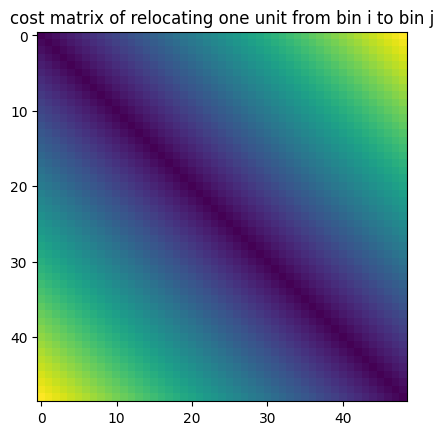

In [31]:
# cacluating the cost matrix 
x = np.arange(nbins-1)
C = np.sqrt((x[np.newaxis] - x[:, np.newaxis])**2)
print(C.shape)
plt.imshow(C)
plt.title('cost matrix of relocating one unit from bin i to bin j')


## Solving an LP to find the optimal transport plan 


\begin{align*}
\text{minimize }_T & <T, C > \\
\text{s.t } & \Sigma^n_{j=1} T_{ij} = a_i \forall i \in {1,...,n} \\
& \Sigma^n_{j=1} T_{ij} = b_j \forall i \in {1,...,n} \\
& T_{ij} \geq 0 \forall (i,j) \in {1,...,n} \\
\end{align*}

aka

\begin{align*}
\text{minimize }_T & <T, C > \\
\text{s.t } & T1 = p \\
& T^T1 = q
\end{align*}



In [32]:
import cvxpy as cp


T = cp.Variable((nbins-1, nbins-1))
cost = cp.Parameter((nbins-1, nbins-1))
cost.value = C 

constraints = [
    T >= 0,
    T @ np.ones(nbins-1) == discretized_kde1,
    T.T @ np.ones(nbins-1) == discretized_kde2
]

obj_func = cp.sum(cp.multiply(T, C))
obj = cp.Minimize(obj_func)
problem = cp.Problem(obj, constraints)
problem.solve()

20.479999999754533

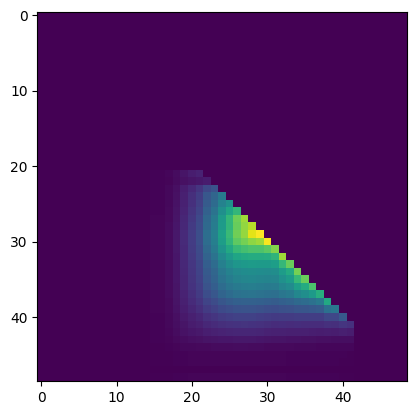

In [33]:
plt.imshow(T.value)

I rounded the bins to 2 dp to make this feasible. I think that the feasible set shrinks to nothing due to floating point calculations. Trying to find an elementwise positive matrix with marginals equal to each discrtized distirbution is pretty tough (without rounding the bins). 


### Wasserstein distance:

In [34]:
np.sum((T.value @ C)) ** 0.5

46.62370641637159

## Transport plan with descritized distribution on either side

GridSpec(2, 2)


Text(0.5, 1.0, 'A better look at the transport plan')

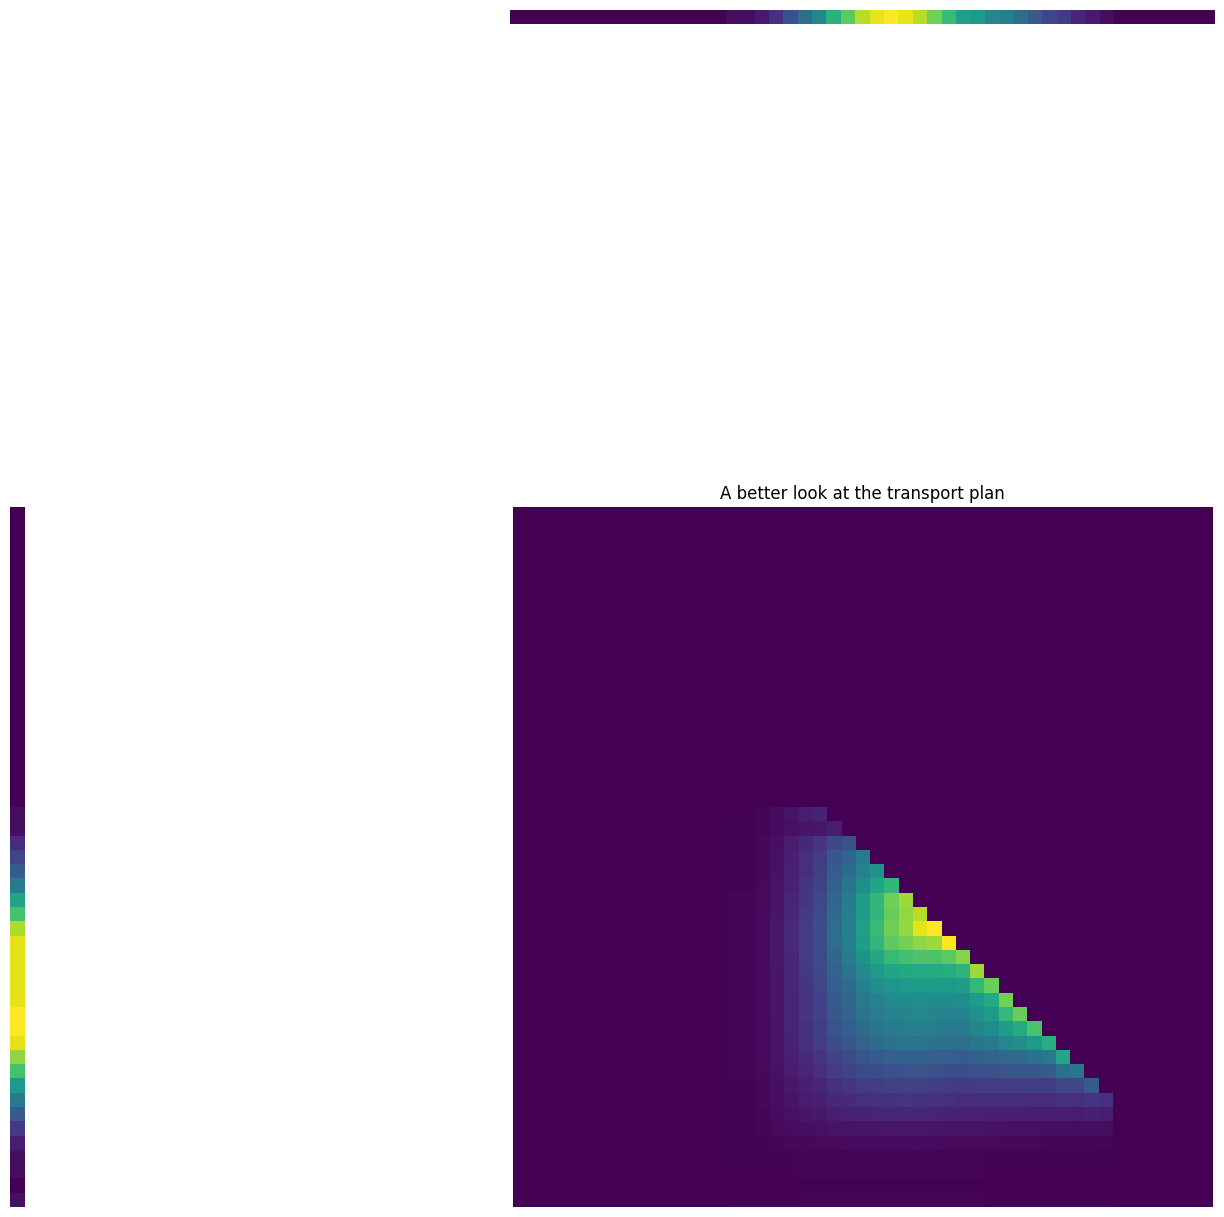

In [36]:
import matplotlib.gridspec as gridspec

# Generate some data
np.random.seed(42)
x = np.random.normal(0, 1, size=1000)
y = np.random.normal(0, 1, size=1000)
gs = gridspec.GridSpec(2, 2, width_ratios=[2,2])
print(gs)

fig = plt.figure(figsize=(20, 20))
ax_joint = fig.add_subplot(gs[0, 1])
ax_joint.imshow(discretized_kde2[np.newaxis])
ax_joint.axis('off')

ax_joint = fig.add_subplot(gs[1, 0])
ax_joint.imshow(discretized_kde1[:,np.newaxis])
ax_joint.axis('off')

ax_joint = fig.add_subplot(gs[1, 1])
ax_joint.imshow(T.value)
ax_joint.axis('off')

plt.title('A better look at the transport plan')